In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf 


In [30]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [31]:
#Dropping certain features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)
#We have created a new dataframe by dropping several columns from the original DataFrame.
#The new DataFrame contains the remaining columns that we are going to train the predictive model.

In [32]:
X = df.drop(['total'], axis =1)
y = df['total']
# We have split the data frame into independent variable (X) and dependent variables (y). 
# Our dependent variables is the total score.

In [33]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

# We have applied label encoding to your categorical features in X.
# We have created separate LabelEncoder objects for each categorical feature and encoded their values.
# We have created mappings to convert the encoded labels back to their original values, which can be helpful for interpreting the results.

In [34]:
# We have split the data into training and testing sets. The training set contains 70 percent of the dataset and rest 30 percent is in test set.
# X_train contains the training data for your input features.
# X_test contains the testing data for your input features.
# y_train contains the training data for your target variable.
# y_test contains the testing data for your target variable.

# Train test Split 

# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#We have performed Min-Max scaling on our input features to ensure all the features are on the same scale
#Scaling is performed to ensure consistent scale to improve model performance.
#Scaling has transformed both training and testing data using the scaling parameters.

In [36]:
# Train test Split 

# We have defined a neural network using TensorFlow and Keras for regression.
# After defining the model, we have compiled the model using the Huber Loss because of the robustness of the regression against outliers.
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


In [37]:
# We have trained the neural network model using the scaled training data.
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 [==============================] - 8s 8ms/step - loss: 32.3546 - val_loss: 22.0857
Epoch 2/50
832/832 [==============================] - 7s 8ms/step - loss: 22.3571 - val_loss: 21.9705
Epoch 3/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2694 - val_loss: 22.1127
Epoch 4/50
832/832 [==============================] - 6s 7ms/step - loss: 22.2565 - val_loss: 22.4277
Epoch 5/50
832/832 [==============================] - 6s 7ms/step - loss: 22.2272 - val_loss: 22.3272
Epoch 6/50
832/832 [==============================] - 7s 9ms/step - loss: 22.1670 - val_loss: 22.2654
Epoch 7/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1480 - val_loss: 22.0322
Epoch 8/50
832/832 [==============================] - 7s 8ms/step - loss: 22.1906 - val_loss: 22.3579
Epoch 9/50
832/832 [==============================] - 7s 8ms/step - loss: 22.1210 - val_loss: 21.7965
Epoch 10/50
832/832 [==============================] - 10s 11ms/step - loss: 22.13

<Axes: >

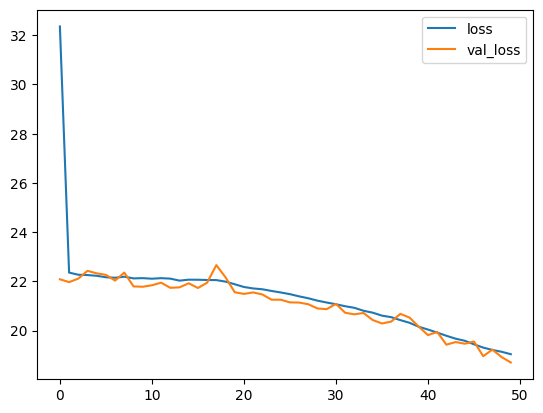

In [38]:
#After the training, we have stored the training and validation loss values to our neural network during the training process.

model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [39]:
#We have predicted using the trained neural network on the testing data.
#The variable predictions contains the predicted total run scores for the test set based on the model’s learned patterns

# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)



713/713 [==============================] - 1s 2ms/step


19.197104172224645

In [40]:
""" We have created an interactive widget using ipywidgets to predict the score based on user input for venue, batting team, bowling team, striker, and bowler.
We have created dropdown widgets to select values for venue, batting team, bowling team, striker, and bowler.
Then, we have added a “Predicted Score” button widget. Whenever, the button will be clicked, the predict_score function will be called and then perform the following steps:
Decodes the user-selected values to their original categorical values.
Encodes and scales these values to match the format used in model training.
Uses the trained model to make a prediction based on the user’s input.
Displays the predicted score. """


import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


In [41]:
#The widget-based interface allows you to interactively predict the score for specific match scenarios. Now, we have set up the button to trigger the predict_score function when clicked and display the widgets for venue, batting team , bowling team, striker and bowler.

predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()